# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [323]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [324]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


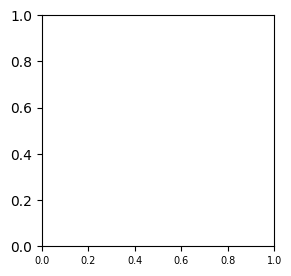

In [325]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

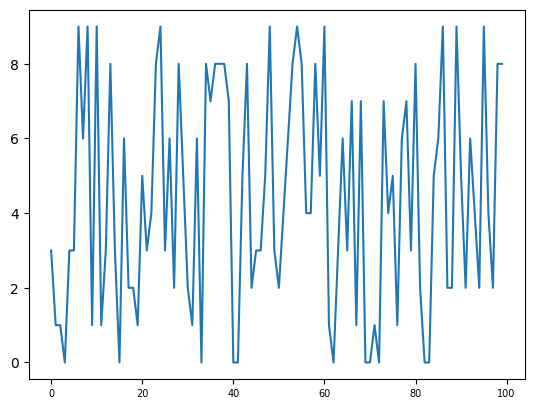

In [326]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

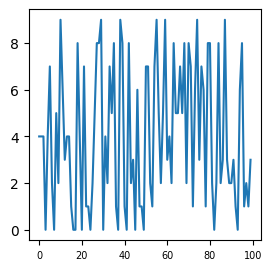

In [327]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

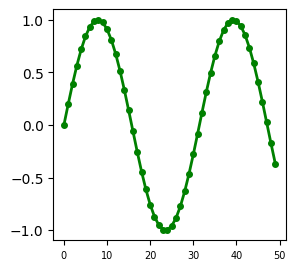

In [328]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
# y = np.sin(x / 5 - 1)
# plt.plot(x, y)
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

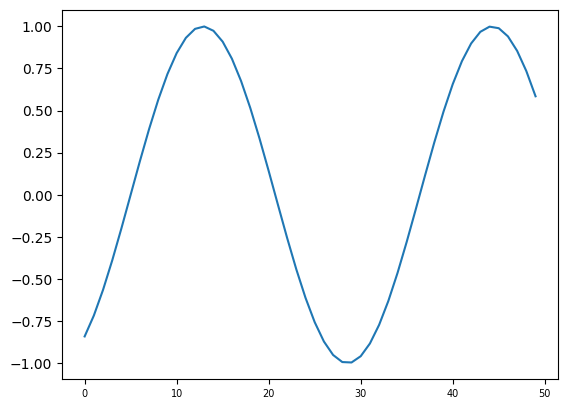

In [329]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


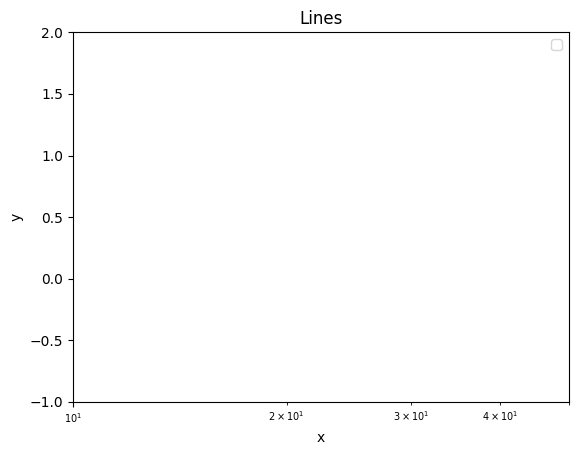

In [330]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

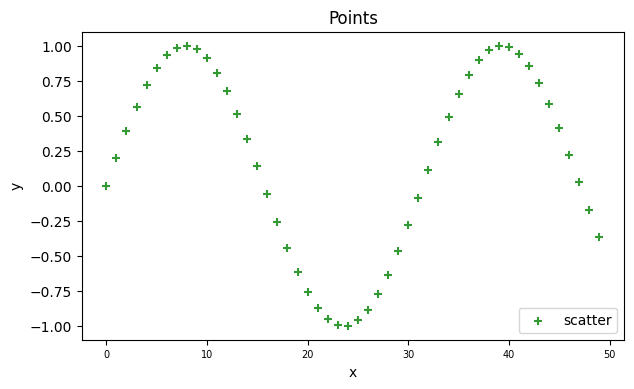

In [331]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

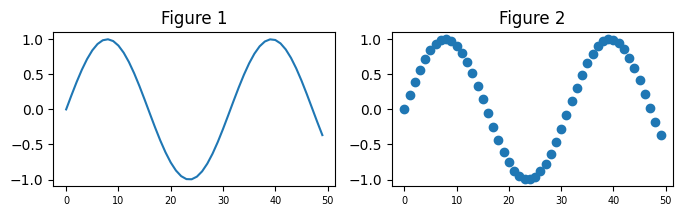

In [332]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

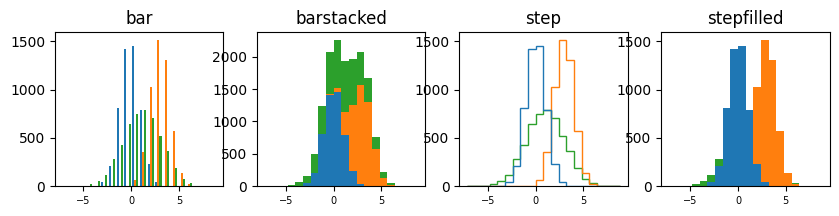

In [333]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

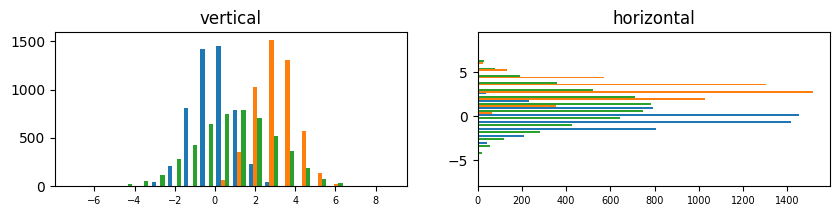

In [334]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [335]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.384099,0.878094,0.777132,0.808664,0.513361,0.578956,0.175430,0.960650,0.111883,0.732877
1,0.890692,0.295032,0.240567,0.249717,0.233621,0.112367,0.521306,0.690113,0.814002,0.243008
2,0.230935,0.957549,0.566397,0.579627,0.067341,0.390743,0.747059,0.985672,0.091709,0.622890
3,0.111668,0.264879,0.140248,0.023042,0.915653,0.548259,0.864260,0.842500,0.989284,0.203956
4,0.307617,0.512129,0.585248,0.452638,0.879569,0.231004,0.179049,0.414710,0.287880,0.065683


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

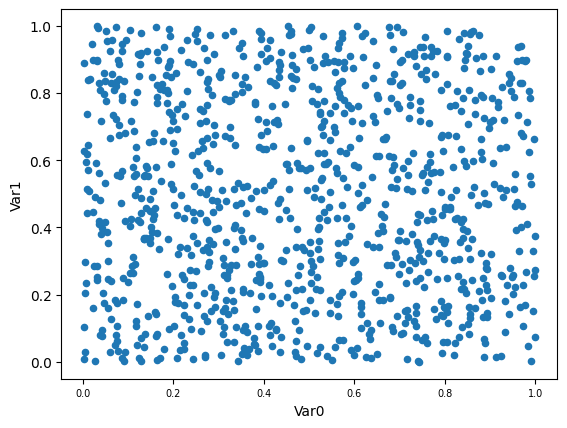

In [336]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

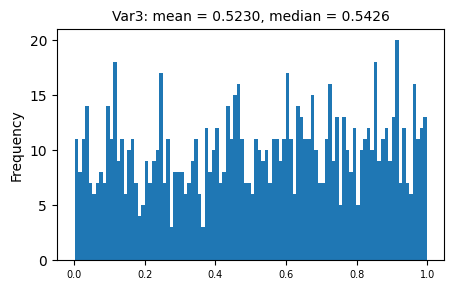

In [337]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

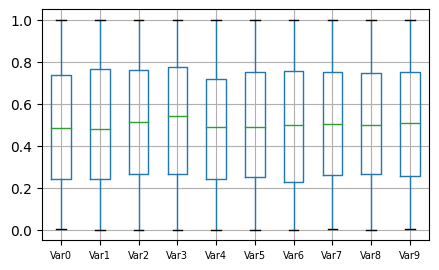

In [338]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

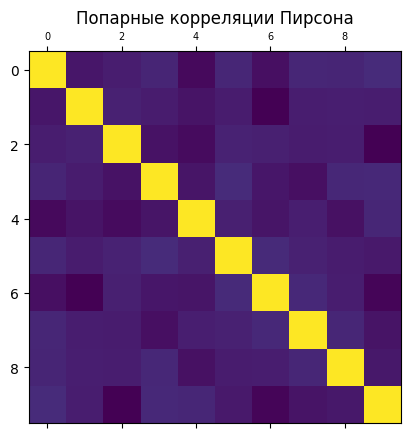

In [339]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

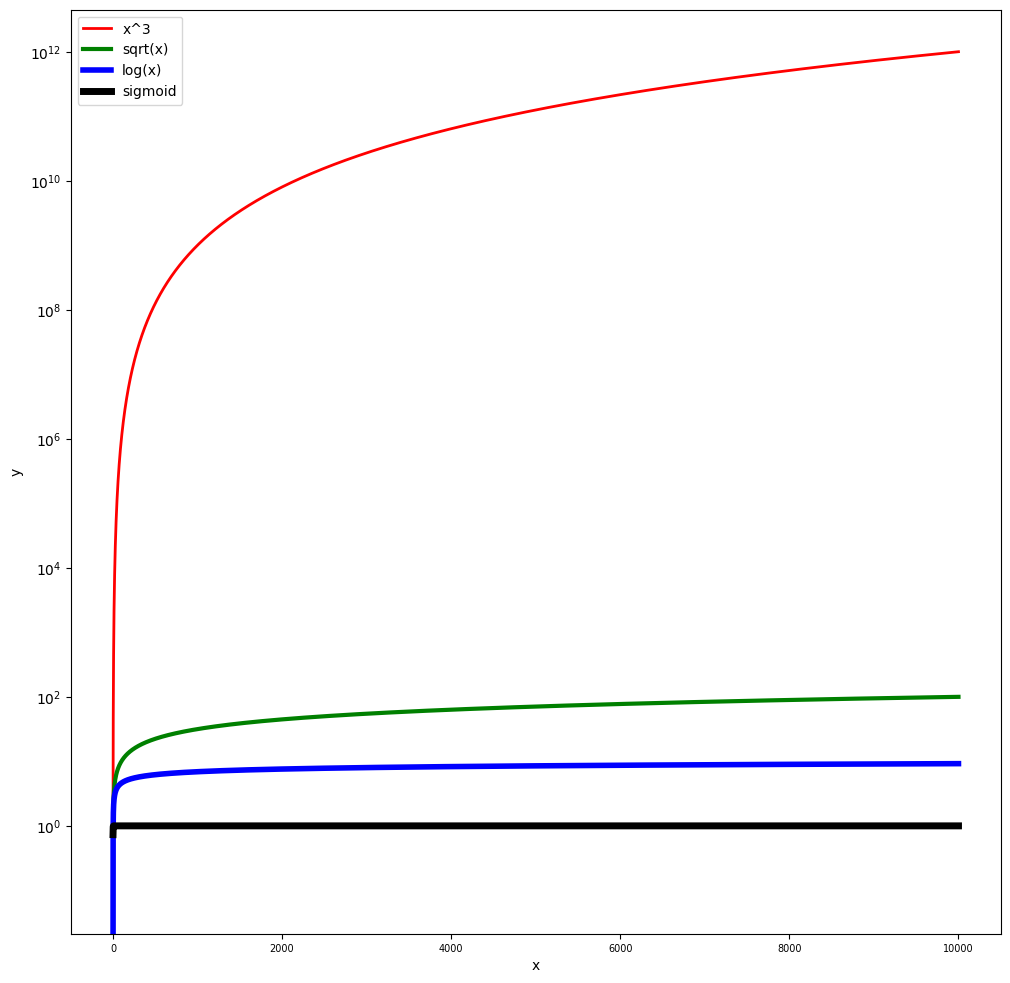

In [340]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))
plt.yscale('log') # Choose the right scale else the sigmoid is hardly visible

x = np.arange(1, 10000, 0.1)

# Plot cubic parabola y = x^3
plt.plot(x, x**3, color='red', linewidth=2, label='x^3')

# Plot square root
plt.plot(x, np.sqrt(x), color='green', linewidth=3, label='sqrt(x)')

# Plot logarithm
plt.plot(x, np.log(x), color='blue', linewidth=4, label='log(x)')

# Plot sigmoid
plt.plot(x, 1/(1+np.exp(-x)), color='black', linewidth=5, label='sigmoid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [341]:
# напишите здесь ваш код

# Create dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Add 50 normally distributed columns
for i in range(50):
    mean = i
    std = i + 1
    col_name = 'col_{}'.format(i)
    df[col_name] = np.random.normal(mean, std, 1000)

df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.024340,1.078078,1.969550,3.025427,4.035145,5.295165,6.048784,7.362848,7.676447,8.778632,...,39.842871,41.514701,40.820513,44.416017,45.979705,44.896530,47.488230,46.667503,46.601700,47.565998
std,1.003553,2.053718,2.868765,4.049132,4.842238,5.974243,7.131136,8.000805,8.570333,9.725887,...,41.065857,43.362588,41.759804,44.472394,46.237849,47.331992,46.157968,46.949610,49.610312,49.082354
min,-2.648922,-5.280899,-10.784549,-9.342466,-10.971885,-13.946747,-21.735237,-19.955701,-19.676170,-20.377931,...,-67.373404,-88.736310,-98.736076,-91.544355,-112.718151,-102.391960,-127.877147,-117.989229,-111.016584,-123.097169
25%,-0.692710,-0.324805,0.061142,0.243737,0.712068,1.285770,1.103292,1.879699,1.781997,2.592656,...,11.543640,12.455888,12.237732,13.465604,15.758950,12.615168,16.524311,14.228529,12.037282,14.025549
50%,-0.059882,1.088366,2.096920,3.032225,3.951090,5.328852,5.966722,7.810826,7.446167,9.003374,...,38.916365,40.378475,43.295767,46.326851,46.068015,46.209430,47.033325,46.602060,47.146055,46.849457
75%,0.664234,2.521339,3.772802,5.778235,7.269415,8.967951,10.638179,12.973202,13.772487,15.549081,...,67.468383,70.047367,69.669725,73.561605,75.194221,77.753194,78.106016,78.062868,81.234156,80.925008
max,3.403696,8.674702,12.662597,18.828383,19.720984,22.903237,34.029852,31.041214,33.797678,37.546952,...,195.496471,200.148158,162.415300,179.018860,193.874241,168.553220,189.063708,192.324702,189.760784,224.245758


3. Определите медианы и стандартные отклонения для всех колонок.

In [342]:
# напишите здесь ваш код
result = None

columns = df.columns
indices = ['std', 'median']
result = pd.DataFrame(np.empty(shape=(len(indices), len(columns))), columns=columns, index=indices)

result.loc['std'] = df.apply(np.std, axis=0)
result.loc['median'] = df.apply(np.median, axis=0)

result


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
std,1.003052,2.052691,2.86733,4.047107,4.839817,5.971256,7.127570,7.996804,8.566046,9.721022,...,41.045319,43.340901,41.738919,44.450152,46.214725,47.30832,46.134883,46.926129,49.585500,49.057807
median,-0.059882,1.088366,2.09692,3.032225,3.951090,5.328852,5.966722,7.810826,7.446167,9.003374,...,38.916365,40.378475,43.295767,46.326851,46.068015,46.20943,47.033325,46.602060,47.146055,46.849457


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

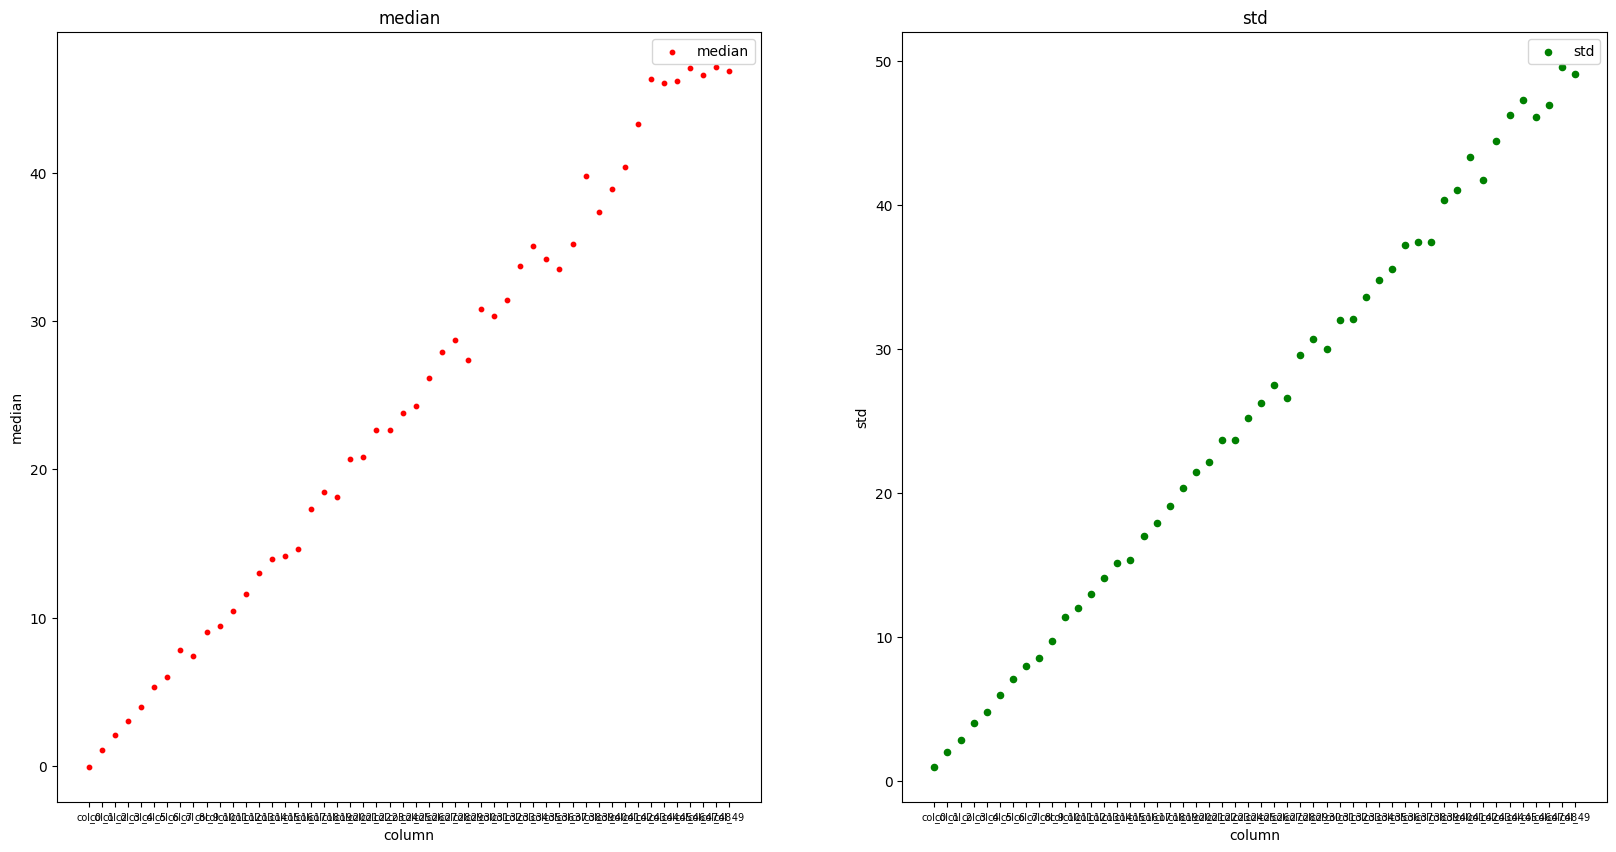

In [343]:
# напишите здесь ваш код
import matplotlib

matplotlib.rc('xtick', labelsize=7)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.scatter(result.columns, result.loc['median'], color='red', s=10, label='median')

plt.title('median')
plt.xlabel('column')
plt.ylabel('median')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(result.columns, result.loc['std'], color='green', s=20, label='std')

plt.title('std')
plt.xlabel('column')
plt.ylabel('std')
plt.legend()

plt.show()

5. Постройте boxplot для любых 10 колонок.

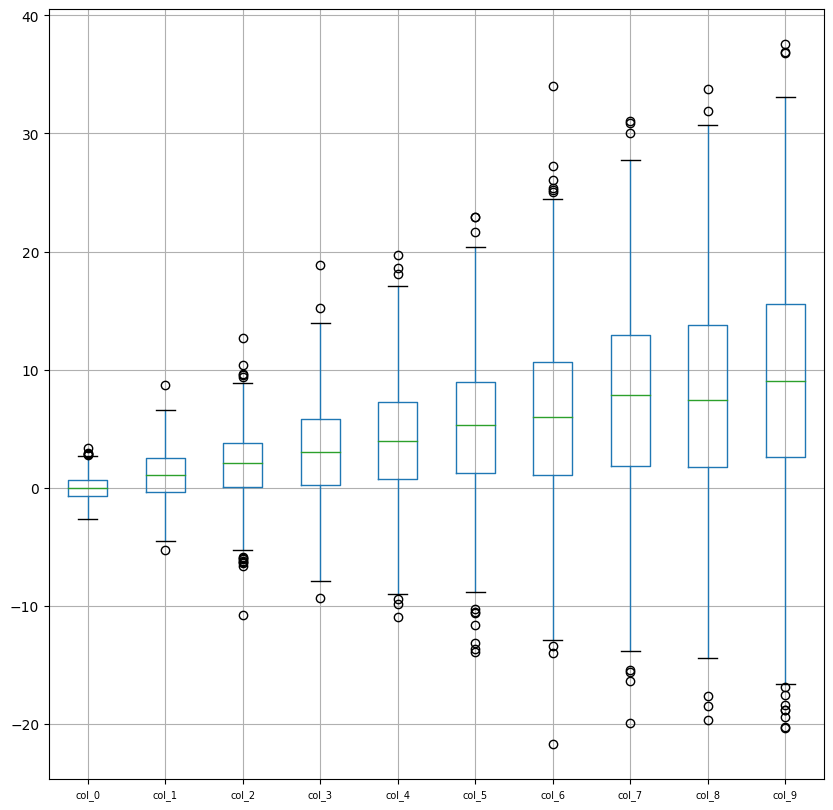

In [344]:
# напишите здесь ваш код
plt.figure(figsize=(10,10))
df.boxplot(column = list(df.columns[0:10]))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [345]:
# напишите здесь ваш код

# Создаем таблицу с 1000 колонками и 1000 строками
data = np.random.uniform(0, 1, size=(1000, 1000))

# Преобразуем массив данных в DataFrame с помощью pandas
df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484832,0.504983,0.498920,0.506807,0.498799,0.497416,0.487350,0.493697,0.504200,0.490205,...,0.499360,0.505536,0.504406,0.501993,0.486047,0.492994,0.488851,0.493567,0.491962,0.494393
std,0.288036,0.286059,0.290181,0.283773,0.289226,0.290426,0.287721,0.292707,0.293377,0.288926,...,0.282521,0.284924,0.293443,0.286373,0.292025,0.289068,0.295642,0.292048,0.293875,0.285817
min,0.000170,0.000347,0.000294,0.000896,0.000959,0.000287,0.003949,0.000613,0.001519,0.000547,...,0.001571,0.001677,0.000170,0.000706,0.000398,0.000026,0.000081,0.000140,0.000074,0.000407
25%,0.238109,0.268810,0.254499,0.268491,0.246110,0.247573,0.235417,0.241267,0.254107,0.240695,...,0.255618,0.266138,0.258046,0.259221,0.226929,0.241371,0.233728,0.232944,0.228809,0.258539
50%,0.469805,0.486988,0.485810,0.504141,0.505154,0.485873,0.473534,0.479912,0.504178,0.500813,...,0.510265,0.514713,0.509437,0.500182,0.477249,0.494898,0.470381,0.496427,0.488549,0.487705
75%,0.736558,0.759396,0.749745,0.750688,0.743310,0.751399,0.737688,0.757984,0.766028,0.732468,...,0.738985,0.752286,0.769614,0.747095,0.738643,0.736044,0.754331,0.740747,0.748743,0.734996
max,0.999324,0.998614,0.998436,0.998012,0.998663,0.999880,0.998918,0.999159,0.999332,0.999601,...,0.999798,0.999057,0.999015,0.999429,0.999531,0.999729,0.997992,0.999223,0.999630,0.999877


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

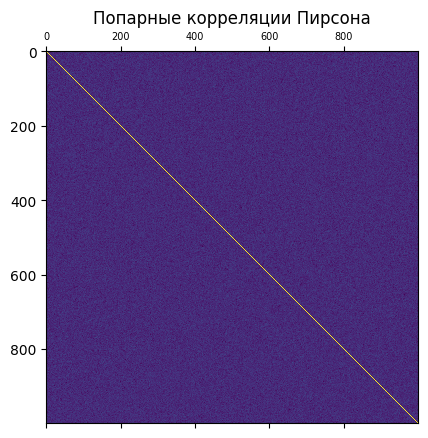

In [346]:
corr = df.corr()
plt.matshow(corr)
plt.title('Попарные корреляции Пирсона')
plt.show()

# continuous below

In [347]:
corr_no_lower_tri = corr

# Remove duplicates
corr_no_lower_tri.values[np.tril_indices_from(corr_no_lower_tri.values)] = 0

corr_no_lower_tri

# continuous below

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.016107,0.001845,0.009193,0.002522,-0.010390,-0.019704,0.011690,-0.021561,0.024776,...,-0.021972,-0.038627,-0.011225,0.014043,-0.035998,0.007095,-0.016194,-0.046580,0.038270,-0.022078
1,0.0,0.000000,0.025257,-0.047470,-0.021106,0.002629,-0.007538,0.049752,0.024443,0.005435,...,0.033964,-0.003048,0.012606,-0.034891,-0.024197,-0.025600,0.018200,0.012471,0.010859,0.003328
2,0.0,0.000000,0.000000,-0.000376,-0.022831,0.010318,-0.050032,0.025452,0.012891,-0.003020,...,0.008103,0.034269,0.004362,-0.012522,-0.051835,0.012044,0.001723,0.012617,-0.016489,-0.011423
3,0.0,0.000000,0.000000,0.000000,-0.042549,-0.028496,-0.051906,0.018812,0.016981,0.015660,...,0.011189,0.032955,-0.030027,-0.029758,0.035064,-0.047348,-0.027654,0.052863,-0.003217,-0.056692
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.062249,0.005241,-0.017277,0.016875,-0.009727,...,0.003622,0.001706,-0.007341,0.008176,0.039326,-0.008735,0.020654,-0.108393,0.043907,0.051154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064931,-0.033647,-0.007843,0.030330
996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.033096,-0.015302,-0.037173
997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043275,-0.009054
998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006271


In [348]:
# Get indices (col1, col2) of maximums
maximums = corr_no_lower_tri.abs().idxmax().items()

from collections import namedtuple

Corr = namedtuple("Corr", ["col1", "col2", "corr"])

corr = []

# zip indices and values obtained by that indices
for maximum_idx, corr_value in zip(maximums, corr_no_lower_tri.abs().max().values):
  corr.append(Corr(col1=maximum_idx[0], col2=maximum_idx[1], corr=corr_value))

# Get the four hightest correlations
corr4 = sorted(corr, reverse=True, key=lambda x: x.corr)[0:4]
corr4

[Corr(col1=733, col2=320, corr=0.13754896771475217),
 Corr(col1=912, col2=715, corr=0.1367798987171112),
 Corr(col1=583, col2=346, corr=0.13516532910494727),
 Corr(col1=989, col2=349, corr=0.13456426153664905)]

8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

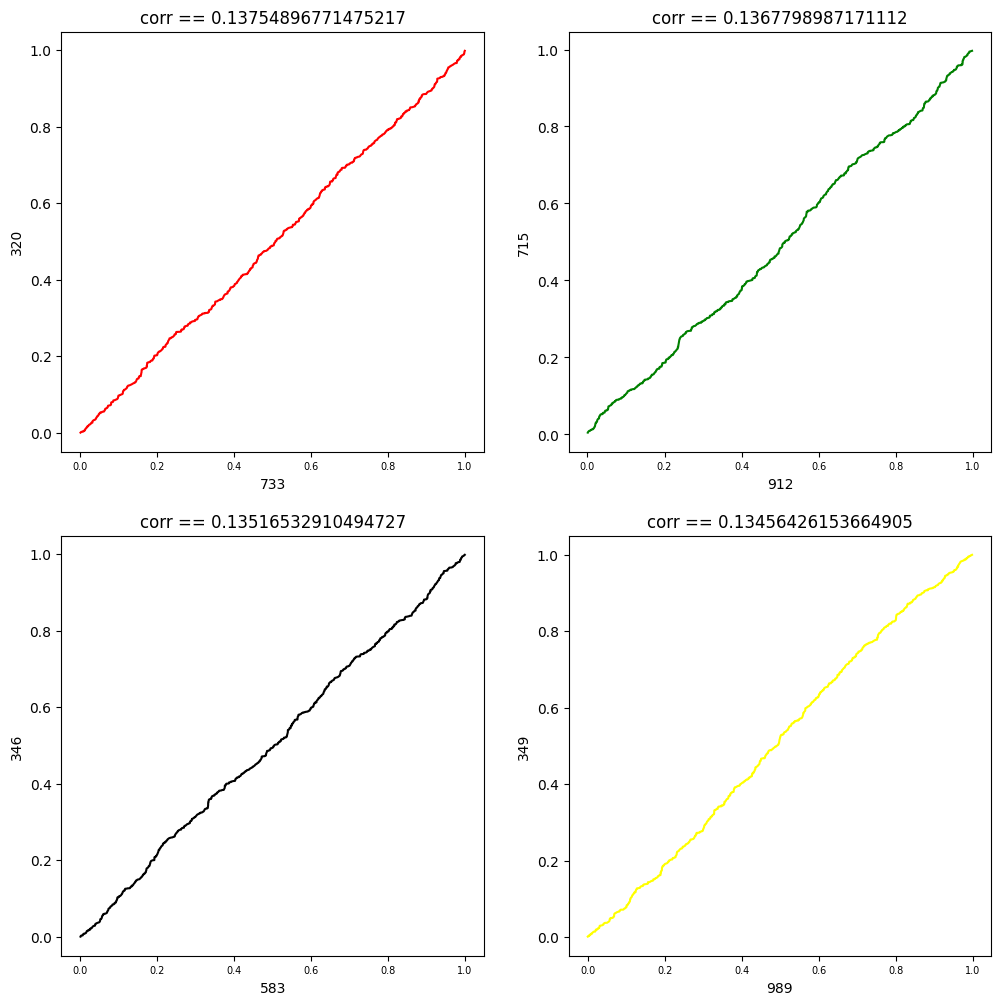

In [349]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)

def plot(corr_item: Corr, color: str):
  plt.plot(sorted(df[corr_item.col1]), sorted(df[corr_item.col2]), color=color)

  plt.title(f'corr == {corr_item.corr}')
  plt.xlabel(corr_item.col1)
  plt.ylabel(corr_item.col2)

plot(corr4[0], 'red')

plt.subplot(2,2,2)
plot(corr4[1], 'green')

plt.subplot(2,2,3)
plot(corr4[2], 'black')

plt.subplot(2,2,4)
plot(corr4[3], 'yellow')

plt.show()

9.  Сделайте вывод о скоррелированности этих случайных величин.

    В соответствии с лекции
    |$r_{xy}$| < 0.19 - очень слабая корреляция

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")